<a href="https://colab.research.google.com/github/BenJoshMudi/GOMYCODE.BEN/blob/main/Africa%20Climate%20Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necccessary libaries
import pandas as pd
import plotly.express as px

In [2]:
# load the dataset
df = pd.read_csv("Africa_climate_change.csv")
df.head()


DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon

In [3]:
# Check for information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [4]:
# Check for the number of NAN in each column
df.isnull().sum()

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

In [5]:
new_data= df.copy()
new_data.head()
new_data.rename(columns={'PRCP': 'Precipitation', 'TAVG':'AvgTemperature',
                         'TMAX': 'MaximumTemp', 'TMIN': 'MinimumTemp.'},inplace=True)
new_data.head()

DATE  Precipitation  AvgTemperature  MaximumTemp  MinimumTemp.  \
0  19800101 000000            NaN            54.0         61.0          43.0   
1  19800101 000000            NaN            49.0         55.0          41.0   
2  19800101 000000            0.0            72.0         86.0          59.0   
3  19800101 000000            NaN            50.0         55.0          43.0   
4  19800101 000000            NaN            75.0         91.0           NaN   

    COUNTRY  
0   Tunisia  
1   Tunisia  
2  Cameroon  
3   Tunisia  
4  Cameroon

In [6]:
year_only = new_data['DATE'].str[:4]
new_data['Year'] = year_only
new_data

DATE  Precipitation  AvgTemperature  MaximumTemp  \
0       19800101 000000            NaN            54.0         61.0   
1       19800101 000000            NaN            49.0         55.0   
2       19800101 000000            0.0            72.0         86.0   
3       19800101 000000            NaN            50.0         55.0   
4       19800101 000000            NaN            75.0         91.0   
...                 ...            ...             ...          ...   
464810  20230823 000000            NaN            85.0         89.0   
464811  20230823 000000            NaN            80.0         90.0   
464812  20230823 000000            NaN            87.0          NaN   
464813  20230823 000000            0.0            82.0         94.0   
464814  20230823 000000            NaN            83.0          NaN   

        MinimumTemp.   COUNTRY  Year  
0               43.0   Tunisia  1980  
1               41.0   Tunisia  1980  
2               59.0  Cameroon  1980  
3               43.0   Tunisia  1980  
4                NaN  Cameroon  1980  
...              ...       ...   ...  
464810           NaN   Senegal  2023  
464811          72.0     Egypt  2023  
464812          73.0     Egypt  2023  
464813           NaN   Senegal  2023  
464814           NaN  Cameroon  2023  

[464815 rows x 7 columns]

In [7]:
new_data.drop('DATE', axis= 1, inplace= True)
new_data.head()

Precipitation  AvgTemperature  MaximumTemp  MinimumTemp.   COUNTRY  Year
0            NaN            54.0         61.0          43.0   Tunisia  1980
1            NaN            49.0         55.0          41.0   Tunisia  1980
2            0.0            72.0         86.0          59.0  Cameroon  1980
3            NaN            50.0         55.0          43.0   Tunisia  1980
4            NaN            75.0         91.0           NaN  Cameroon  1980

In [9]:
# changing the dtype of Year from string to int
new_data['Year'] = new_data['Year'].astype(int)
new_data['Year'].dtype

dtype('int64')

In [10]:
# Set the limit
# Drop columns using that limit
limit = len(new_data) * 0.7
new=new_data.dropna(axis=1, thresh=limit)
# View columns in the dataset
new.head()

AvgTemperature  MaximumTemp  MinimumTemp.   COUNTRY  Year
0            54.0         61.0          43.0   Tunisia  1980
1            49.0         55.0          41.0   Tunisia  1980
2            72.0         86.0          59.0  Cameroon  1980
3            50.0         55.0          43.0   Tunisia  1980
4            75.0         91.0           NaN  Cameroon  1980

In [12]:
new.columns

Index(['AvgTemperature', 'MaximumTemp', 'MinimumTemp.', 'COUNTRY', 'Year'], dtype='object')

In [13]:
# Assigning the mean value to only the mimimum Temp Column
new.loc[:, 'MinimumTemp.'] = new['MinimumTemp.'].fillna(new['MinimumTemp.'].mean())

In [14]:
# Verify if there is any missing values
new.isnull().sum()

AvgTemperature      6376
MaximumTemp       100914
MinimumTemp.           0
COUNTRY                0
Year                   0
dtype: int64

In [15]:
import plotly.express as px

# Selecting dataframe to answer the temperature fluctuations in Tunisia and Cameroon
countries = ['Tunisia', 'Cameroon']
df = new_data[new_data['COUNTRY'].isin(countries)]

# Line chart to show fluctuations
fig = px.line(df, x='Year', y="AvgTemperature", color="COUNTRY", markers=True,
              title="Average Temperature Fluctuations in Tunisia and Cameroon")
fig.show()

In [16]:
# Interpreting the results:

# By visualizing the entire dataset, you can observe the overall trends and patterns in temperature fluctuations in Tunisia and Cameroon across all available years.
# If the lines for both countries follow similar patterns, it indicates that they experience similar temperature fluctuations over time.
# Differences in the trends between the lines may suggest variations in climate or weather patterns between Tunisia and Cameroon.
# Any significant spikes or dips in the lines could indicate extreme weather events or shifts in climate conditions.

# Countries: Tunisia (blue line) and Cameroon (red line) are represented.
# Temperature Range: The y-axis shows average temperature, ranging from -50 to 100.
# Time Period: The data spans from 1980 to around 2020.
# Similar Trends: Both countries had similar temperature patterns until around 2020.
# Cameroon’s Drop: Around 2020, Cameroon’s average temperature significantly dropped below -50.
# Legend: A legend indicates the colors corresponding to each country.
# Temperature Fluctuations: Both countries experienced fluctuations between approximately 50 and 100.
# Tunisia’s Consistency: Tunisia’s temperature remained relatively stable.
# Cameroon’s Anomaly: The drastic drop in Cameroon’s temperature is an anomaly.

In [17]:
# Selecting dataframe to answer the temperature fluctuations in Tunisia and Cameroon
countries = ['Tunisia', 'Cameroon']
df = new_data[new_data['COUNTRY'].isin(countries)]
time = df.loc[(df['Year'] >= 1980) & (df['Year'] <= 2005)]

# Line chart to show fluctuations
fig = px.line(time, x=time['Year'], y="AvgTemperature", color="COUNTRY", markers=True,
              title="Average Temperature Fluctuations in Tunisia and Cameroon")
fig.show()

In [18]:
import plotly.graph_objects as go

In [19]:
# Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023]
senegal = new.loc[new['COUNTRY'] == 'Senegal']
time1 = new.loc[(new['Year'] >= 1980) & (new['Year'] <= 2000)]
time2 = new.loc[(new['Year'] >= 2000) & (new['Year'] <= 2023)]

# Create histograms
fig = px.histogram(senegal, x="AvgTemperature", title='Average Temperature Distribution in Senegal')
fig.update_layout(barmode='overlay')  # Overlay histograms for better comparison

# Add histograms for each time period
fig.add_trace(go.Histogram(x=time1['AvgTemperature'], nbinsx=20, opacity=0.5, name='1980-2000'))
fig.add_trace(go.Histogram(x=time2['AvgTemperature'], nbinsx=20, opacity=0.5, name='2000-2023'))

# Show the plot
fig.show()

In [20]:
# Select the best chart to show the Average temperature per country.
avg_temp= new.groupby('COUNTRY')['AvgTemperature'].mean().reset_index()
display(avg_temp.head())
px.pie(data_frame= avg_temp, names= 'COUNTRY',
       values= 'AvgTemperature', hole= 0.3, title= 'Average Temperature by Country')

COUNTRY  AvgTemperature
0    Angola       75.930017
1  Cameroon       80.315806
2     Egypt       73.839069
3   Senegal       82.964651
4   Tunisia       67.736422

How have average temperatures changed over time for each country?

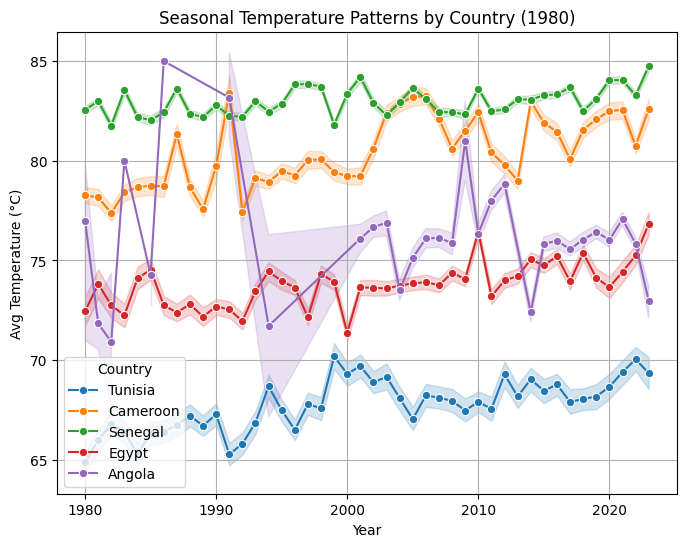

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'new' is your DataFrame
plt.figure(figsize=(8, 6))
sns.lineplot(data=new, x='Year', y='AvgTemperature', hue='COUNTRY', marker='o')
plt.title('Seasonal Temperature Patterns by Country (1980)')
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

In [22]:
"""
Seasonal Fluctuations:
All countries exhibit seasonal variations with peaks and troughs.
These fluctuations represent changes in temperature throughout the year.

Temperature Trends:
Each colored line represents a country’s temperature trend over the years.
Tunisia (green) and Cameroon (orange) generally have higher temperatures.
Angola (blue) has the lowest temperatures.
Senegal (purple) and Egypt (red) fall in between

"""

'\nSeasonal Fluctuations:\nAll countries exhibit seasonal variations with peaks and troughs.\nThese fluctuations represent changes in temperature throughout the year.\n\nTemperature Trends:\nEach colored line represents a country’s temperature trend over the years.\nTunisia (green) and Cameroon (orange) generally have higher temperatures.\nAngola (blue) has the lowest temperatures.\nSenegal (purple) and Egypt (red) fall in between\n\n'

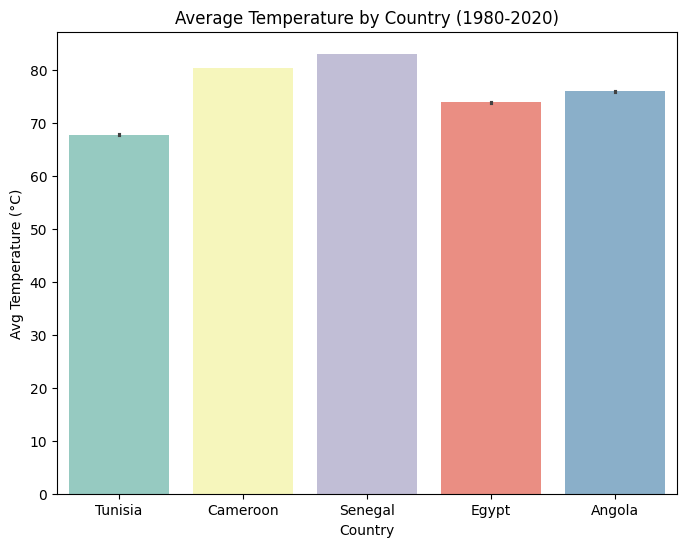

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(data=new, x='COUNTRY', y='AvgTemperature', hue='COUNTRY', palette='Set3', legend=False)
plt.title('Average Temperature by Country (1980-2020)')
plt.xlabel('Country')
plt.ylabel('Avg Temperature (°C)')
plt.show()

ANSWER

Senegal experienced the highest average temperature among the countries listed in the graph. The red bar representing Egypt reaches close to 70°C, indicating the warmest climate1 **bold text**

Is there a correlation between temperature and geographical location (latitude)?

NOTE: Latitude and Temperature:

Latitude plays a significant role in determining average temperatures.
As one moves away from the equator (higher latitudes), temperatures generally decrease.

Conversely, closer to the equator (lower latitudes), temperatures tend to be warmer.

This patternds true globally: it gets warmer towards the equator and cooler towards the poles.

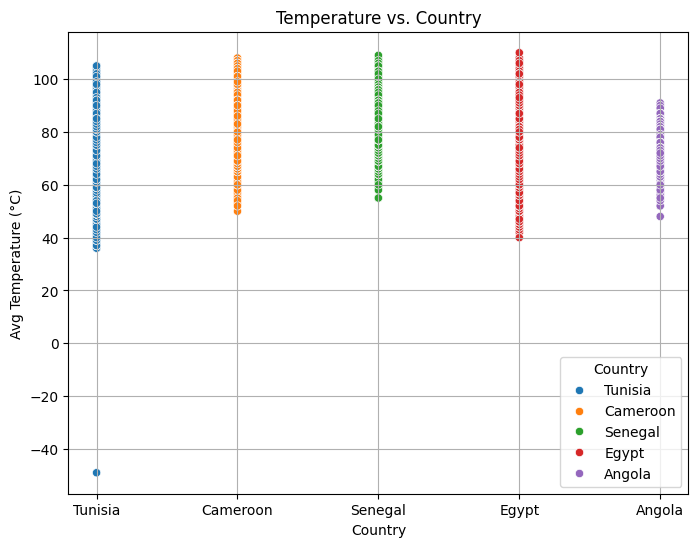

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new, x='COUNTRY', y='AvgTemperature', hue='COUNTRY', marker='o')
plt.title('Temperature vs. Country')
plt.xlabel('Country')
plt.ylabel('Avg Temperature (°C)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


ANSWER: Yes, there is a correlation between temperature and geographical location (latitude) in the graph. The countries further north (Tunisia and Cameroon) have lower average temperatures, while those further south (Senegal, Egypt, and Angola) have higher average temperatures
**bold text**